## Analísis de datos exploratorio

In esta sección se realiza un analísis exploratorio de datos a los conjunto limpios.

Se puede extraer valiosa información de como son los datos, además de corroborar que los datos son buenos para el entrenamiento de un algoritmo de aprendizaje automatico.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('font', size=14)

#Center plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>
""")

Leyendo los archivos en formato pickle extraidos en el archivo de limpieza.

In [5]:
corpus_non = pd.read_pickle('corpus_non.pkl')
corpus_agressive = pd.read_pickle('corpus_agressive.pkl')
corpus_non

,text
0,easyjet quiere duplicar el número de mujeres p...
1,el gobierno debe crear un control estricto de ...
2,yo veo a mujeres destruidas por acoso laboral ...
3,yo soy respetuoso con los demás sólamente les...
4,antonio caballero y como ser de mal gusto e ig...
...,...
4442,porque las mujeres pierden la regla a los por...
4444,absurda europa y bruselas el populismo es lo q...
4447,callaté visto que te dejo en puta
4448,porque los hombres se casan con las mujeres po...


Convirtiendo los textos agresivos y no agresivos en un solo string para la visualización en una nube de palabras.

In [15]:
agressive_wc = ''
non_agressive_wc = ''
for index,text in enumerate(corpus_non.transpose().columns):
    non_agressive_wc += corpus_non.text[text]
for index, text in enumerate(corpus_agressive.transpose().columns):
    agressive_wc += corpus_agressive.text[text]

from collections import Counter

## Graficando las palabras más frecuentes

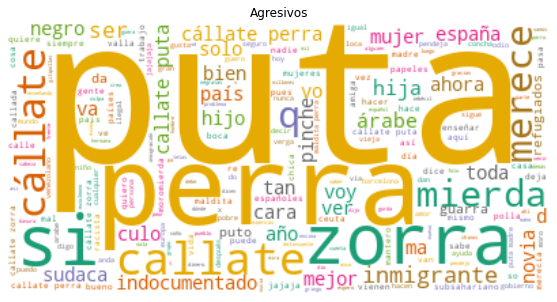

In [35]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words = stopwords.words('spanish')
wc = WordCloud(stopwords=stop_words, background_color="white", colormap='Dark2', max_font_size=150, random_state=42)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
wc.generate(agressive_wc)
plt.axis("off")
plt.title('Agresivos')
plt.imshow(wc, interpolation='bilinear')
#ax = fig.add_subplot(1,2,2)
#wc.generate(non_agressive_wc)
#plt.imshow(wc,interpolation='bilinear')
#plt.axis('off')
#plt.title("No agresivos")
plt.savefig('word_clouds.png', bbox_inches='tight')
plt.show()